In [48]:
import csv
from collections import Counter

print("Problem 1, A-C:")
print("This website was used for this part: https://www.geeksforgeeks.org/working-csv-files-python/")
print("This website also helpped for collections: https://docs.python.org/3/library/collections.html#collections.Counter\n")

filename = r"C:\Users\colin\Downloads\Grocery_Items_7.csv"
fields = []
dataset = []
flattened_items = []
filtered_items = []

with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    for row in csvreader:
        dataset.append(row)
    
for row in dataset:
    for item in row:
        flattened_items.append(item)

for item in flattened_items:
    stripped_item = item.strip()
    if not stripped_item.isdigit() and stripped_item:
        filtered_items.append(item)

unique_items = set(filtered_items)
number_of_unique_items = len(unique_items)

counter = Counter(filtered_items)
most_frequent_item, count = counter.most_common(1)[0]

print("(c):")
print("There are ", number_of_unique_items, " unique items in our list, not counting numbers or white spaces")
print("There are ", len(dataset), " records in our dataset")
print("The most frequent item is: ", most_frequent_item, " with ", count, " items")

Problem 1, A-C:
This website was used for this part: https://www.geeksforgeeks.org/working-csv-files-python/
This website also helpped for collections: https://docs.python.org/3/library/collections.html#collections.Counter

(c):
There are  165  unique items in our list, not counting numbers or white spaces
There are  8000  records in our dataset
The most frequent item is:  whole milk  with  1338  items


In [66]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules

print("Problem 1, D:")
print("This website was used for this section: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/\n")

dataset_without_empty_spaces = [] 

for transaction in dataset:  
    list_without_empty_spaces = []  
    for item in transaction: 
        if item: 
            list_without_empty_spaces.append(item) 
    dataset_without_empty_spaces.append(list_without_empty_spaces)

te = TransactionEncoder()
te_ary = te.fit(dataset_without_empty_spaces).transform(dataset_without_empty_spaces)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
#frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.01, use_colnames=True)

print("(d):")
print(frequent_itemsets)

num_itemsets = len(frequent_itemsets)
association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="confidence", min_threshold=0.08)

Problem 1, D:
This website was used for this section: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

(d):
     support                        itemsets
0   0.097125                          (soda)
1   0.068875                (tropical fruit)
2   0.039000                    (newspapers)
3   0.111000                    (rolls/buns)
4   0.061250                 (bottled water)
..       ...                             ...
62  0.012750              (whole milk, soda)
63  0.014375        (rolls/buns, whole milk)
64  0.011250  (rolls/buns, other vegetables)
65  0.011500            (whole milk, yogurt)
66  0.014250  (whole milk, other vegetables)

[67 rows x 2 columns]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(soda),0.158000,0.097125,0.012750,0.080696,0.830849,1.0,-0.002596,0.982129,-0.194712,0.052604,-0.018196,0.105985
1,(soda),(whole milk),0.097125,0.158000,0.012750,0.131274,0.830849,1.0,-0.002596,0.969236,-0.183999,0.052604,-0.031741,0.105985
2,(rolls/buns),(whole milk),0.111000,0.158000,0.014375,0.129505,0.819649,1.0,-0.003163,0.967265,-0.198402,0.056456,-0.033843,0.110243
3,(whole milk),(rolls/buns),0.158000,0.111000,0.014375,0.090981,0.819649,1.0,-0.003163,0.977977,-0.207182,0.056456,-0.022519,0.110243
4,(rolls/buns),(other vegetables),0.111000,0.118250,0.011250,0.101351,0.857094,1.0,-0.001876,0.981195,-0.157931,0.051606,-0.019165,0.098244
5,(other vegetables),(rolls/buns),0.118250,0.111000,0.011250,0.095137,0.857094,1.0,-0.001876,0.982470,-0.159023,0.051606,-0.017843,0.098244
6,(yogurt),(whole milk),0.087750,0.158000,0.011500,0.131054,0.829457,1.0,-0.002365,0.968990,-0.183931,0.049093,-0.032002,0.101919
7,(whole milk),(other vegetables),0.158000,0.118250,0.014250,0.090190,0.762705,1.0,-0.004433,0.969158,-0.269809,0.054389,-0.031823,0.105349
8,(other vegetables),(whole milk),0.118250,0.158000,0.014250,0.120507,0.762705,1.0,-0.004433,0.957370,-0.260818,0.054389,-0.044528,0.105349


In [80]:
te = TransactionEncoder()
te_ary = te.fit(dataset_without_empty_spaces).transform(dataset_without_empty_spaces)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets_one = fpgrowth(df, min_support=0.001, use_colnames=True)
#frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.01, use_colnames=True)

print(frequent_itemsets_one)

num_itemsets_one = len(frequent_itemsets_one)
rules = association_rules(frequent_itemsets_one, num_itemsets=num_itemsets_one, metric="confidence", min_threshold=0.05)
print(rules.shape[0])

frequent_itemsets_two = fpgrowth(df, min_support=0.005, use_colnames=True)
#frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.01, use_colnames=True)

print(frequent_itemsets_two)

num_itemsets_two = len(frequent_itemsets_two)
rules_two = association_rules(frequent_itemsets_two, num_itemsets=num_itemsets_two, metric="confidence", min_threshold=0.075)
print(rules_two.shape[0])

frequent_itemsets_three = fpgrowth(df, min_support=0.01, use_colnames=True)
#frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.01, use_colnames=True)

print(frequent_itemsets_three)

num_itemsets_three = len(frequent_itemsets_three)
rules_three = association_rules(frequent_itemsets_three, num_itemsets=num_itemsets_three, metric="confidence", min_threshold=0.1)
print(rules_three.shape[0])

      support                            itemsets
0    0.097125                              (soda)
1    0.068875                    (tropical fruit)
2    0.039000                        (newspapers)
3    0.111000                        (rolls/buns)
4    0.061250                     (bottled water)
..        ...                                 ...
773  0.001625  (long life bakery product, yogurt)
774  0.001250    (long life bakery product, pork)
775  0.001375    (long life bakery product, soda)
776  0.001000          (dish cleaner, whole milk)
777  0.001125                (whole milk, brandy)

[778 rows x 2 columns]
506
      support                             itemsets
0    0.097125                               (soda)
1    0.068875                     (tropical fruit)
2    0.039000                         (newspapers)
3    0.111000                         (rolls/buns)
4    0.061250                      (bottled water)
..        ...                                  ...
127  0.006375  

Problem 1, E:
Used these websites as resources: 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html
https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.from_tuples.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
https://seaborn.pydata.org/generated/seaborn.heatmap.html


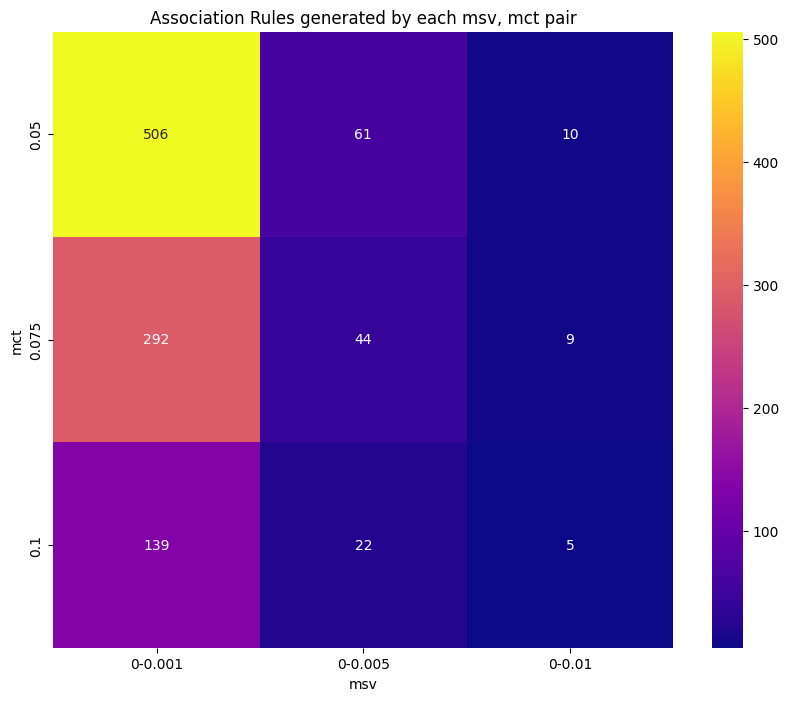

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Problem 1, E:")
print("Used these websites as resources: \nhttps://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html")
print("https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.from_tuples.html")
print("https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html")
print("https://seaborn.pydata.org/generated/seaborn.heatmap.html")

msvs = [0.001, 0.005, 0.01] 
mcts = [0.05, 0.075, 0.1]  
rule_counts = {}

for msv in msvs:
    for mct in mcts:
        frequent_itemsets = fpgrowth(df, min_support=msv, use_colnames=True)
        
        num_itemsets = len(frequent_itemsets)
        rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="confidence", min_threshold=mct)

        rule_counts[(msv, mct)] = rules.shape[0]

rule_counts_data = pd.DataFrame.from_dict(rule_counts, orient='index')
rule_counts_data.index = pd.MultiIndex.from_tuples(rule_counts_data.index, names=["MSV", "MCT"])

rule_counts_unstack = rule_counts_data.unstack(level=0)

plt.figure(figsize=(10, 8))
sns.heatmap(rule_counts_unstack, annot=True, cmap="plasma", fmt="d")
plt.title("Association Rules generated by each msv, mct pair")
plt.xlabel("msv")
plt.ylabel("mct")
plt.show()


In [29]:
import numpy as np
from tensorflow import keras
from keras import layers
import tensorflow as tf

print("Problem 2:")
print("Used these websites as resources:")
print("https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator")
print("https://www.tensorflow.org/api_docs/python/tf/keras/Model")
print("https://keras.io/examples/vision/mnist_convnet/\n")

directory = r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\Cropped'

num_classes = 4 
input_shape = (28, 28, 3) 

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,    
    validation_split=0.2,    
)

train_generator = image_data_generator.flow_from_directory(
    directory,
    target_size=(28, 28),
    color_mode='rgb', 
    class_mode='categorical', 
    batch_size=32,
    shuffle=True,       
    subset="training",  
)

validation_generator = image_data_generator.flow_from_directory(
    directory,
    target_size=(28, 28),
    color_mode='rgb', 
    class_mode='categorical', 
    batch_size=32,
    shuffle=True,       
    subset="training",  
)

print("")

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),  # Use the simplified shape
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(8, activation="relu"),
        layers.Dense(4, activation="softmax"),
    ]
)

model.summary()

batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_generator, batch_size=batch_size, epochs=epochs, validation_data=validation_generator)
history

score = model.evaluate(validation_generator)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])


Problem 2:
Used these websites as resources:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
https://www.tensorflow.org/api_docs/python/tf/keras/Model
https://keras.io/examples/vision/mnist_convnet/

Found 595 images belonging to 4 classes.
Found 595 images belonging to 4 classes.



Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 26, 26, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 11, 11, 4)           │             292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 5, 5, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 8)                   │             808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,360 (5.31 KB)

 Trainable params: 1,360 (5.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2545 - loss: 1.3911 - val_accuracy: 0.2672 - val_loss: 1.3806
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2429 - loss: 1.3780 - val_accuracy: 0.2790 - val_loss: 1.3638
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3015 - loss: 1.3562 - val_accuracy: 0.3882 - val_loss: 1.3231
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3959 - loss: 1.3156 - val_accuracy: 0.4101 - val_loss: 1.2653
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4437 - loss: 1.2466 - val_accuracy: 0.4437 - val_loss: 1.2107
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4820 - loss: 1.1796 - val_accuracy: 0.4739 - val_loss: 1.1602
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4977 - loss: 1.1465 - val_accuracy: 0.4908 - val_loss: 1.1397
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5056 - loss: 1.1371 - val_accuracy: 0.5143 - v

Problem 2, plotting the learning curves
Used this website to recall the history so I could use it to plot the learning curve:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History



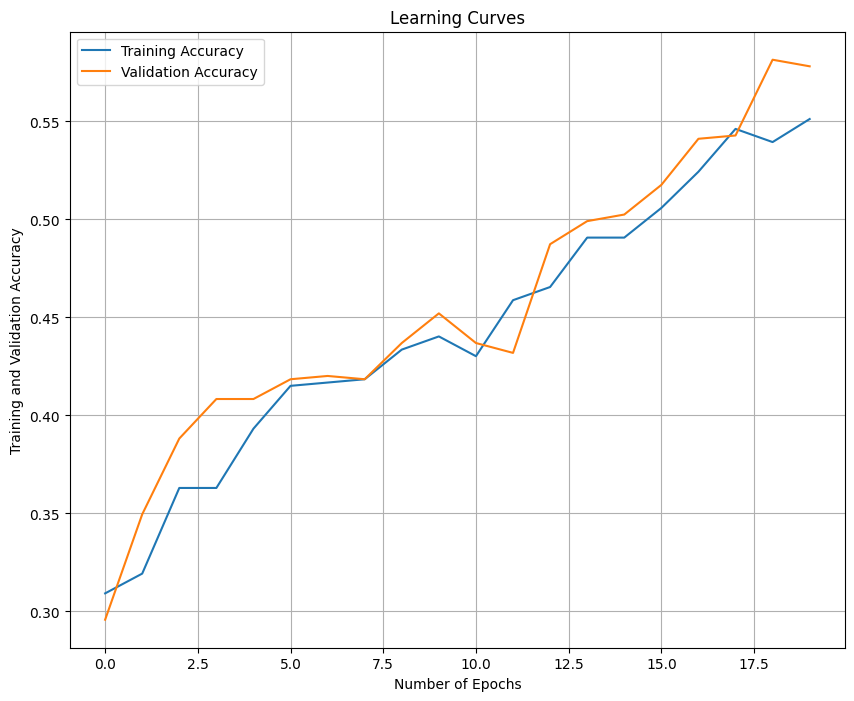

In [47]:
import matplotlib.pyplot as plt

print("Problem 2, plotting the learning curves")
print("Used this website to recall the history so I could use it to plot the learning curve:")
print("https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History\n")

plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curves')
plt.xlabel('Number of Epochs')
plt.ylabel('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

My banner ID is 916328544, so the last digit of my banner ID is 4, so I will be doing (b)
This section is for 8 filters on 2nd convolution layer


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 26, 26, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 11, 11, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 5, 5, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 8)                   │           1,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,452 (9.58 KB)

 Trainable params: 2,452 (9.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.2834 - loss: 1.3838 - val_accuracy: 0.3008 - val_loss: 1.3710
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2941 - loss: 1.3679 - val_accuracy: 0.3193 - val_loss: 1.3536
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3644 - loss: 1.3487 - val_accuracy: 0.3782 - val_loss: 1.3262
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3774 - loss: 1.3258 - val_accuracy: 0.3361 - val_loss: 1.3063
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3919 - loss: 1.3019 - val_accuracy: 0.4672 - val_loss: 1.2589
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5123 - loss: 1.2609 - val_accuracy: 0.5462 - val_loss: 1.2269
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5505 - loss: 1.2099 - val_accuracy: 0.5782 - val_loss: 1.1841
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5446 - loss: 1.1892 - val_accuracy: 0.5815 - v

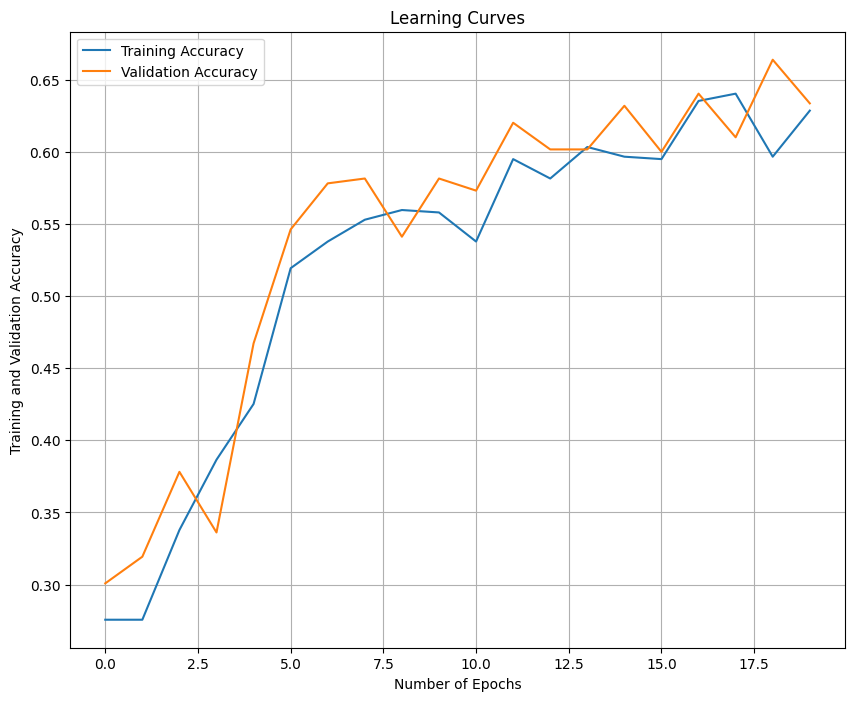

In [48]:
print("My banner ID is 916328544, so the last digit of my banner ID is 4, so I will be doing (b)")
print("This section is for 8 filters on 2nd convolution layer")

model_two = keras.Sequential(
    [
        keras.Input(shape=input_shape),  # Use the simplified shape
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(8, activation="relu"),
        layers.Dense(4, activation="softmax"),
    ]
)

model_two.summary()

batch_size = 128
epochs = 20

model_two.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_two = model_two.fit(train_generator, batch_size=batch_size, epochs=epochs, validation_data=validation_generator)
history_two

score = model_two.evaluate(validation_generator)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

plt.figure(figsize=(10, 8))
plt.plot(history_two.history['accuracy'], label='Training Accuracy')
plt.plot(history_two.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curves')
plt.xlabel('Number of Epochs')
plt.ylabel('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

This section is for 16 filters on 2nd convolution layer


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 26, 26, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 8)                   │           3,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,636 (18.11 KB)

 Trainable params: 4,636 (18.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.2389 - loss: 1.3918 - val_accuracy: 0.2706 - val_loss: 1.3783
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2544 - loss: 1.3773 - val_accuracy: 0.2739 - val_loss: 1.3710
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2959 - loss: 1.3713 - val_accuracy: 0.3361 - val_loss: 1.3515
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3000 - loss: 1.3448 - val_accuracy: 0.3176 - val_loss: 1.3086
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3429 - loss: 1.2956 - val_accuracy: 0.4017 - val_loss: 1.2500
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4182 - loss: 1.2427 - val_accuracy: 0.5630 - val_loss: 1.1942
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5177 - loss: 1.1984 - val_accuracy: 0.5244 - val_loss: 1.1520
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5102 - loss: 1.1583 - val_accuracy: 0.5647 - v

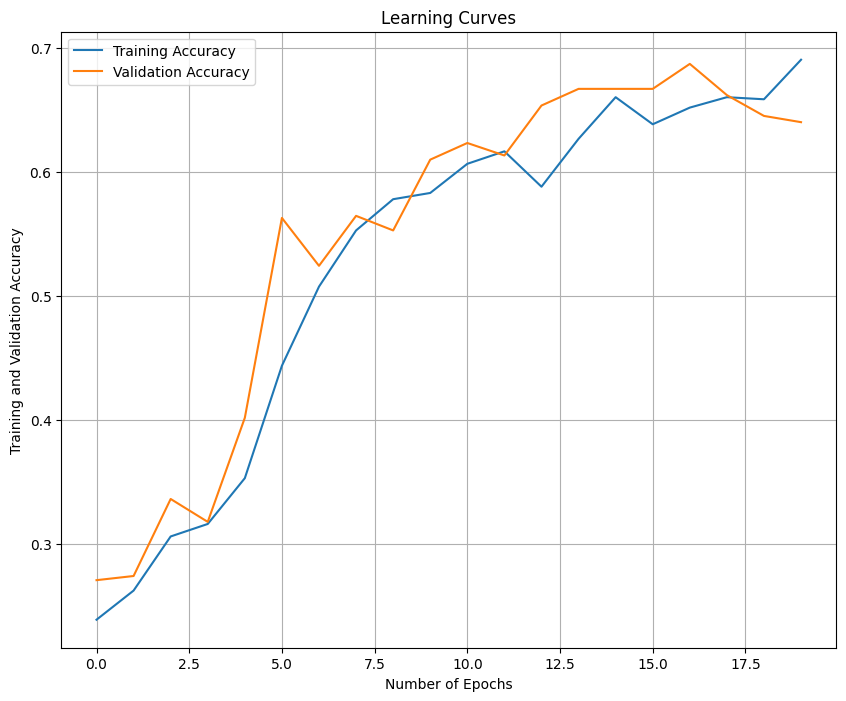

In [41]:
print("This section is for 16 filters on 2nd convolution layer")

model_three = keras.Sequential(
    [
        keras.Input(shape=input_shape),  # Use the simplified shape
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(8, activation="relu"),
        layers.Dense(4, activation="softmax"),
    ]
)

model_three.summary()

batch_size = 128
epochs = 20

model_three.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_three = model_three.fit(train_generator, batch_size=batch_size, epochs=epochs, validation_data=validation_generator)
history_three

score = model_three.evaluate(validation_generator)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

plt.figure(figsize=(10, 8))
plt.plot(history_three.history['accuracy'], label='Training Accuracy')
plt.plot(history_three.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curves')
plt.xlabel('Number of Epochs')
plt.ylabel('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
print("Observing the performance of the original model compared to the other two models with the different filter sizes, I can say that")
print("the 2nd convolution layer with 16 filters on average performed the best, as it had an average accuracy of 64%, compared to 60% and 63% from the other two models.\n")
print("This can make one believe that increasing the number of filters will increase our average performance of our model. The 16 filter model also had the highest peak accuracy.")
print("Thus, the 2nd convolution layer using 16 filters performed better than the original model and the model with 8 filters.\n")
print("I will say that I believe the models that were made are just right as both training and validation accuracies stick close enough togegther and the accuracies go up as more epochs are finished, thus showing us that it is actually training and learning")

Observing the performance of the original model compared to the other two models with the different filter sizes, I can say that
the 2nd convolution layer with 16 filters on average performed the best, as it had an average accuracy of 64%, compared to 60% and 63% from the other two models.

This can make one believe that increasing the number of filters will increase our average performance of our model. The 16 filter model also had the highest peak accuracy.
Thus, the 2nd convolution layer using 16 filters performed better than the original model and the model with 8 filters.

I will say that I believe the models that were made are just right as both training and validation accuracies stick close enough togegther and the accuracies go up as more epochs are finished, thus showing us that it is actually training and learning


In [2]:
import json
from datasets import Dataset, DatasetDict

print("Problem 3:")
print("Mainly just followed the tutorial from the website linked:")
print("https://github.com/NielsRogge/Transformers-Tutorials/blob/master/BERT/Fine_tuning_BERT_(and_friends)_for_multi_label_text_classification.ipynb")

json_path_training = r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\train.json'
json_path_test = r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\test.json'
json_path_validation = r'C:\Users\colin\Downloads\Data Mining 1 - Programming Assignment 1\validation.json'

def get_tweets(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

train_data = get_tweets(json_path_training)
test_data = get_tweets(json_path_test)
validation_data = get_tweets(json_path_validation)

dataset = DatasetDict({
    'train': Dataset.from_list(train_data),
    'test': Dataset.from_list(test_data),
    'validation': Dataset.from_list(validation_data)
})

example = dataset['train'][0]
print(example) 

labels = [label for label in dataset['train'].features.keys() if label not in ['ID', 'Tweet']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels
#id2label
#label2id

Problem 3:
Mainly just followed the tutorial from the website linked:
https://github.com/NielsRogge/Transformers-Tutorials/blob/master/BERT/Fine_tuning_BERT_(and_friends)_for_multi_label_text_classification.ipynb
{'ID': '2017-En-10973', 'Tweet': "So I'm not being shady but one of Jongdae's ex rumoured girlfriends is going on WGM I'm not saying I'm over joyed but I'm over joyed #bitter", 'anger': False, 'anticipation': False, 'disgust': False, 'fear': False, 'joy': True, 'love': False, 'optimism': False, 'pessimism': False, 'sadness': False, 'surprise': False, 'trust': False}


['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness',
 'surprise',
 'trust']

In [3]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_data(examples):
  # take a batch of texts
  text = examples["Tweet"]
  # encode them
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
  # add labels
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(text), len(labels)))
  # fill numpy array
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()
  
  return encoding

C:\Users\colin\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [5]:
example = encoded_dataset['train'][0]
print(example.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


In [6]:
example['labels']

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [7]:
[id2label[idx] for idx, label in enumerate(example['labels']) if label == 1.0]

['joy']

In [8]:
encoded_dataset.set_format("torch")

In [9]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", 
                                                           problem_type="multi_label_classification", 
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
batch_size = 8
metric_name = "f1"

In [5]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"bert-finetuned-sem_eval-english",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

C:\Users\colin\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [6]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch
    
# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, 
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds, 
        labels=p.label_ids)
    return result

In [13]:
encoded_dataset['train'][0]['labels'].type()

'torch.FloatTensor'

In [14]:
encoded_dataset['train']['input_ids'][0]

tensor([  101,  2061,  1045,  1005,  1049,  2025,  2108, 22824,  2021,  2028,
         1997, 18528,  6858,  1005,  1055,  4654, 19379, 16777, 27408,  2003,
         2183,  2006,  1059, 21693,  1045,  1005,  1049,  2025,  3038,  1045,
         1005,  1049,  2058,  6569,  2098,  2021,  1045,  1005,  1049,  2058,
         6569,  2098,  1001,  8618,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [15]:
#forward pass
outputs = model(input_ids=encoded_dataset['train']['input_ids'][0].unsqueeze(0), labels=encoded_dataset['train'][0]['labels'].unsqueeze(0))
outputs

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


SequenceClassifierOutput(loss=tensor(0.7561, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[-0.0821, -0.0349, -0.4089,  0.5261, -0.5390, -0.3086, -0.1222,  0.5098,
          0.1762,  0.4065, -0.1455]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [16]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [17]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,No log,0.351310,0.618696,0.735007,0.217500
2,0.400100,0.325114,0.658318,0.759562,0.255000
3,0.287500,0.318982,0.682899,0.779858,0.262500
4,0.242400,0.322219,0.685682,0.783172,0.260000
5,0.242400,0.322509,0.686734,0.784254,0.267500


TrainOutput(global_step=1875, training_loss=0.29095354817708335, metrics={'train_runtime': 7559.8036, 'train_samples_per_second': 1.984, 'train_steps_per_second': 0.248, 'total_flos': 986746187520000.0, 'train_loss': 0.29095354817708335, 'epoch': 5.0})

In [19]:
trainer.evaluate()

{'eval_loss': 0.32250916957855225,
 'eval_f1': 0.6867335562987736,
 'eval_roc_auc': 0.7842537172435182,
 'eval_accuracy': 0.2675,
 'eval_runtime': 30.854,
 'eval_samples_per_second': 12.964,
 'eval_steps_per_second': 1.621,
 'epoch': 5.0}

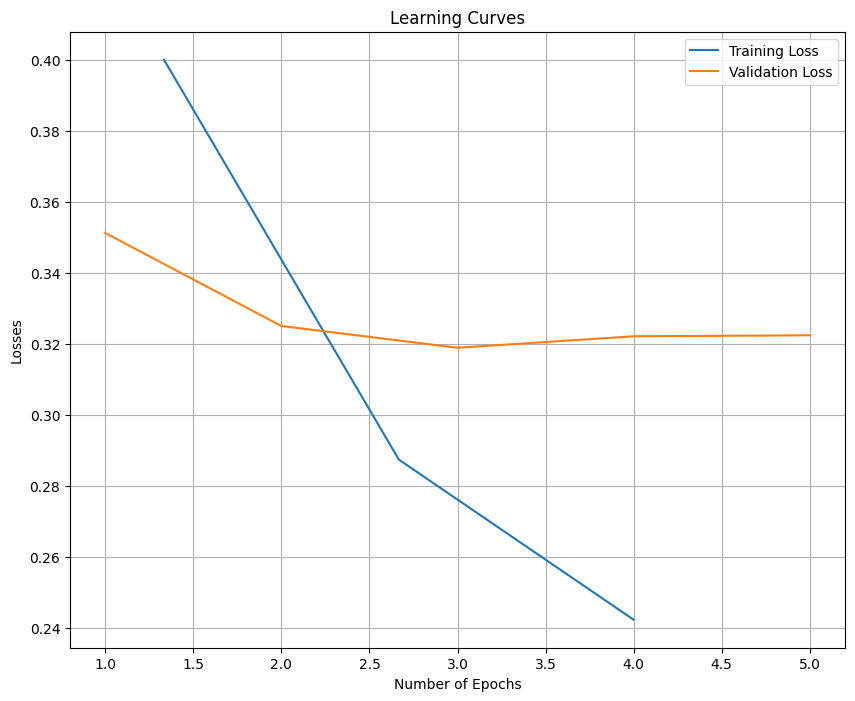

In [20]:
import matplotlib.pyplot as plt

history = trainer.state.log_history

training_loss = []
validation_loss = []
epoch_training = []
epoch_validation = []

for log in history:
    #print(log)
    if "loss" in log: 
        #print(log["loss"])
        epoch_training.append(log["epoch"])
        training_loss.append(log["loss"])
    if "eval_loss" in log: 
        #print(log[eval_loss])
        epoch_validation.append(log["epoch"])
        validation_loss.append(log["eval_loss"])

plt.figure(figsize=(10, 8))
plt.plot(epoch_training, training_loss, label="Training Loss")
plt.plot(epoch_validation, validation_loss, label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Losses")
plt.title("Learning Curves")
plt.grid(True)
plt.legend()
plt.show()

In [24]:
print("The test accuracy for the approach 'all labels must match' is: 0.267500")

The test accuracy for the approach 'all labels must match' is: 0.267500


In [44]:
print("Now modifying the accuracy so that the prediciton is correct as long as one label matches")

Now modifying the accuracy so that the prediciton is correct as long as one label matches


In [7]:
args = TrainingArguments(
    f"bert-finetuned-sem_eval-english",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="eval_one_label_accuracy",
    # push_to_hub=True,
)

In [41]:
def multi_label_metrics(predictions, labels, threshold=0.5):
    # Apply sigmoid to predictions
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # Turn probabilities into binary predictions using the threshold
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # Compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average='micro')
    one_correct_label = np.logical_and(y_pred, y_true).any(axis=1) 
    one_label_accuracy = one_correct_label.mean() 
    # Return as dictionary
    metrics = {
        'f1': f1_micro_average,
        'roc_auc': roc_auc,
        'one_label_accuracy': one_label_accuracy
    }
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, 
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds, 
        labels=p.label_ids)
    return result

Now modifying the accuracy so that the prediciton is correct as long as one label matches


In [42]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [43]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1,Roc Auc,One Label Accuracy
1,No log,0.377682,0.685031,0.793317,0.852500
2,0.134300,0.362367,0.677909,0.777954,0.855000
3,0.131900,0.370299,0.687738,0.788052,0.865000
4,0.102500,0.375685,0.683836,0.784942,0.860000
5,0.102500,0.380145,0.682314,0.784570,0.857500


TrainOutput(global_step=1875, training_loss=0.11559182739257813, metrics={'train_runtime': 6878.6379, 'train_samples_per_second': 2.181, 'train_steps_per_second': 0.273, 'total_flos': 986746187520000.0, 'train_loss': 0.11559182739257813, 'epoch': 5.0})

In [1]:
print("The test accuracy for this new method is 0.857500 or 85.75% accurate")

The test accuracy for this new method is 0.857500 or 85.75% accurate
